<a href="https://colab.research.google.com/github/silviolima07/time_series/blob/main/Estudo_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Estudo sobre a Temperatura Global e Teste da lib NeuralProphet

### Tables of Global and Hemispheric Monthly Means and Zonal Annual Means Combined Land-Surface Air and Sea-Surface Water Temperature Anomalies (Land-Ocean Temperature Index, L-OTI)

### References:

-  GISTEMP Team, 2023: GISS Surface Temperature Analysis (GISTEMP), version 4. NASA Goddard Institute for Space Studies. Dataset accessed 20YY-MM-DD at https://data.giss.nasa.gov/gistemp/.
- Lenssen, N., G. Schmidt, J. Hansen, M. Menne, A. Persin, R. Ruedy, and D. Zyss, 2019: Improvements in the GISTEMP uncertainty model. J. Geophys. Res. Atmos., 124, no. 12, 6307-6326, doi:10.1029/2018JD029522.

In [ ]:
!pip uninstall neuralprophet --q --y
#
!pip install neuralprophet --q

In [ ]:
#!pip uninstall holidays --y
#
#!pip uninstall torch --y

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt


from neuralprophet import NeuralProphet

##############


%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

import plotly.io as pio
pio.renderers

pio.renderers.default = 'colab'


## Global-mean monthly, seasonal, and annual means, 1880-present

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/DATASETS/GLB.Ts+dSST.csv", skiprows=1)

In [ ]:
df

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
0,1880,-0.18,-0.24,-0.09,-0.16,-0.10,-0.21,-0.18,-0.10,-.15,-.23,-.22,-.17,-.17,***,***,-0.12,-0.16,-.20
1,1881,-0.19,-0.14,0.03,0.05,0.06,-0.18,0.00,-0.04,-.15,-.22,-.18,-.07,-.09,-.10,-.17,0.05,-0.07,-.19
2,1882,0.16,0.14,0.04,-0.17,-0.15,-0.23,-0.16,-0.07,-.14,-.24,-.17,-.36,-.11,-.09,.08,-0.09,-0.15,-.18
3,1883,-0.29,-0.37,-0.12,-0.18,-0.17,-0.08,-0.06,-0.14,-.21,-.11,-.23,-.11,-.17,-.19,-.34,-0.16,-0.09,-.18
4,1884,-0.13,-0.08,-0.36,-0.40,-0.34,-0.36,-0.30,-0.27,-.27,-.25,-.33,-.31,-.28,-.27,-.11,-0.36,-0.31,-.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,2019,0.93,0.95,1.17,1.02,0.85,0.90,0.94,0.95,.93,1.01,.99,1.09,.98,.96,.93,1.01,0.93,.98
140,2020,1.17,1.24,1.17,1.13,1.02,0.92,0.90,0.87,.99,.89,1.10,.81,1.02,1.04,1.17,1.11,0.90,.99
141,2021,0.81,0.64,0.89,0.75,0.78,0.84,0.92,0.82,.93,1.00,.94,.86,.85,.84,.76,0.81,0.86,.95
142,2022,0.91,0.89,1.05,0.84,0.84,0.92,0.94,0.95,.90,.97,.73,.79,.89,.90,.89,0.91,0.94,.86


In [ ]:
df.columns

Index(['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec', 'J-D', 'D-N', 'DJF', 'MAM', 'JJA', 'SON'],
      dtype='object')

In [ ]:
cols = ['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec']

In [ ]:
df = df[cols]

### Transformar colunas em linhas, gerando a coluna Month

In [ ]:
df_nasa = df.melt(id_vars=["Year"],
        var_name="Month",
        value_name="Temperature")

In [ ]:
df_nasa

,Year,Month,Temperature
0,1880,Jan,-0.18
1,1881,Jan,-0.19
2,1882,Jan,0.16
3,1883,Jan,-0.29
4,1884,Jan,-0.13
...,...,...,...
1723,2019,Dec,1.09
1724,2020,Dec,.81
1725,2021,Dec,.86
1726,2022,Dec,.79


In [ ]:
df_nasa.loc[df_nasa.Year == 2023]

,Year,Month,Temperature
143,2023,Jan,0.87
287,2023,Feb,0.97
431,2023,Mar,1.2
575,2023,Apr,1.0
719,2023,May,0.93
863,2023,Jun,1.08
1007,2023,Jul,1.19
1151,2023,Aug,1.24
1295,2023,Sep,***
1439,2023,Oct,***


In [ ]:
temp = np.where(df_nasa.Temperature != "***", df_nasa.Temperature, np.nan )
df_nasa["Temperature"] = temp

In [ ]:
df_nasa.isnull().sum()

Year           0
Month          0
Temperature    4
dtype: int64

In [ ]:
df_nasa.dropna(inplace=True)

In [ ]:
df_nasa.isnull().sum()

Year           0
Month          0
Temperature    0
dtype: int64

In [ ]:
df_nasa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1724 entries, 0 to 1726
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Year         1724 non-null   int64 
 1   Month        1724 non-null   object
 2   Temperature  1724 non-null   object
dtypes: int64(1), object(2)
memory usage: 53.9+ KB


### Converter Temperature para float.

In [ ]:
df_nasa["Temperature"] = [float(str(i).replace(",", "")) for i in df_nasa["Temperature"]]

In [ ]:
df_nasa

,Year,Month,Temperature
0,1880,Jan,-0.18
1,1881,Jan,-0.19
2,1882,Jan,0.16
3,1883,Jan,-0.29
4,1884,Jan,-0.13
...,...,...,...
1722,2018,Dec,0.91
1723,2019,Dec,1.09
1724,2020,Dec,0.81
1725,2021,Dec,0.86


### Criar coluna year_month como datetime.

In [ ]:
df_nasa['year_month'] = pd.to_datetime(df_nasa['Year'].astype(str)+ '-' + df_nasa['Month'], format='%Y-%b')

In [ ]:
df_nasa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1724 entries, 0 to 1726
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Year         1724 non-null   int64         
 1   Month        1724 non-null   object        
 2   Temperature  1724 non-null   float64       
 3   year_month   1724 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 67.3+ KB


In [ ]:
df_nasa

,Year,Month,Temperature,year_month
0,1880,Jan,-0.18,1880-01-01
1,1881,Jan,-0.19,1881-01-01
2,1882,Jan,0.16,1882-01-01
3,1883,Jan,-0.29,1883-01-01
4,1884,Jan,-0.13,1884-01-01
...,...,...,...,...
1722,2018,Dec,0.91,2018-12-01
1723,2019,Dec,1.09,2019-12-01
1724,2020,Dec,0.81,2020-12-01
1725,2021,Dec,0.86,2021-12-01


### Definir coluna datetime year_month como index.

In [ ]:
df_nasa.set_index('year_month', inplace=True)

In [ ]:
df_nasa.head()

,Year,Month,Temperature
year_month,,,
1880-01-01,1880,Jan,-0.18
1881-01-01,1881,Jan,-0.19
1882-01-01,1882,Jan,0.16
1883-01-01,1883,Jan,-0.29
1884-01-01,1884,Jan,-0.13


## Temperatura média ao longos dos meses de 1880 a 2023.

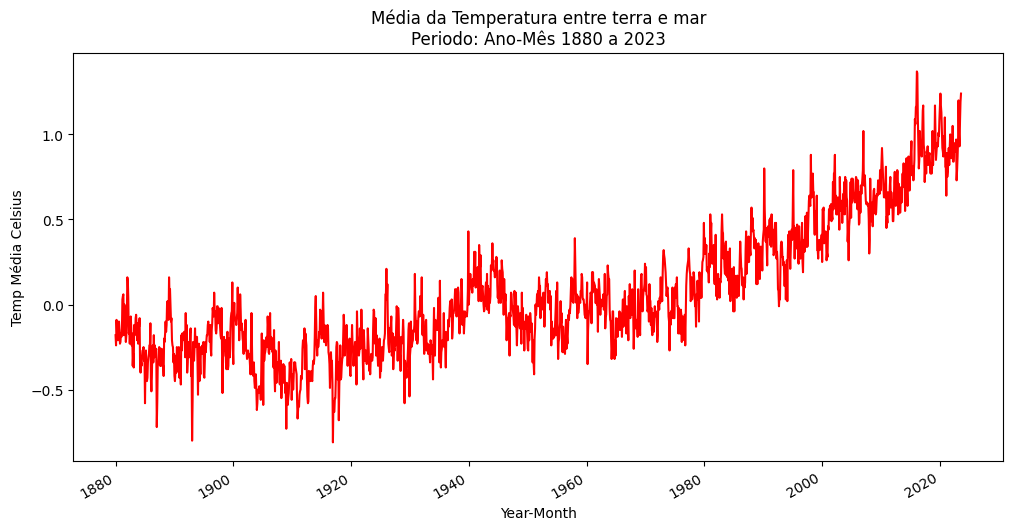

In [ ]:
temperature = df_nasa['Temperature']
#
plt.figure(figsize= (12,6))
temperature.plot(title='Média da Temperatura entre terra e mar\nPeriodo: Ano-Mês 1880 a 2023', color='red')
plt.ylabel("Temp Média Celsius")
plt.xlabel("Year-Month")
plt.show()

## Temperature ao longos dos anos de 1880 a 2023.

<Figure size 1200x600 with 0 Axes>

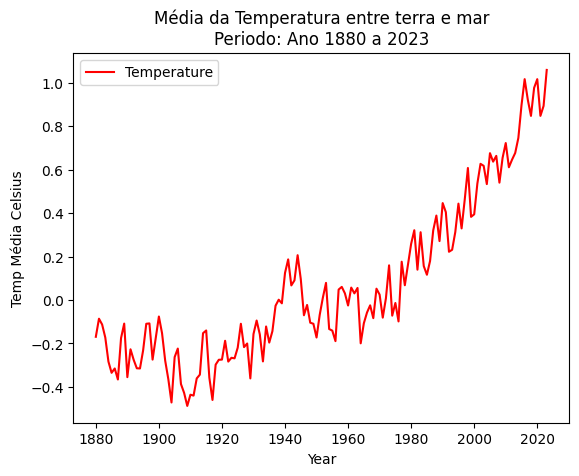

In [ ]:
year = df_nasa.groupby('Year')['Temperature'].mean()
#
plt.figure(figsize= (12,6))
year.to_frame().plot(title='Média da Temperatura entre terra e mar\nPeriodo: Ano 1880 a 2023',color='red')
plt.ylabel("Temp Média Celsius")
plt.xlabel("Year")
plt.show()

### Ordenar os meses do dataset antes de plotar por meses.

In [ ]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

### Coluna months tipo category é ordenada.

In [ ]:
df_nasa['months'] = pd.Categorical(df_nasa['Month'], categories=months, ordered=True)

In [ ]:
df_nasa

,Year,Month,Temperature,months
year_month,,,,
1880-01-01,1880,Jan,-0.18,Jan
1881-01-01,1881,Jan,-0.19,Jan
1882-01-01,1882,Jan,0.16,Jan
1883-01-01,1883,Jan,-0.29,Jan
1884-01-01,1884,Jan,-0.13,Jan
...,...,...,...,...
2018-12-01,2018,Dec,0.91,Dec
2019-12-01,2019,Dec,1.09,Dec
2020-12-01,2020,Dec,0.81,Dec


<Figure size 1200x600 with 0 Axes>

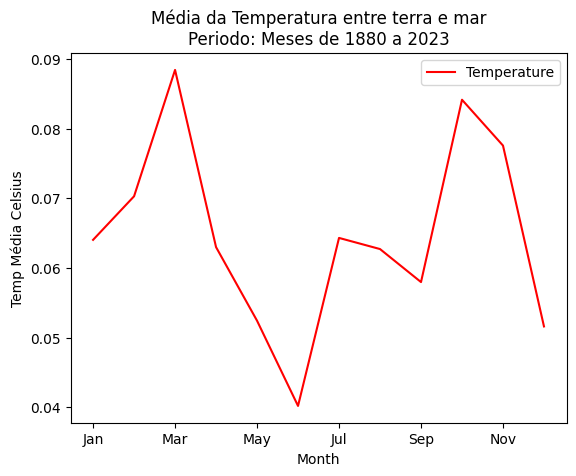

In [ ]:
month = df_nasa.groupby('months')['Temperature'].mean()
#
plt.figure(figsize= (12,6))
month.to_frame().plot(title='Média da Temperatura entre terra e mar\nPeriodo: Meses de 1880 a 2023',color='red')
plt.ylabel("Temp Média Celsius")
plt.xlabel("Month")
plt.show()

## NeuralProphet

### References:
- https://neuralprophet.com/contents.html
- https://towardsdatascience.com/in-depth-understanding-of-neuralprophet-through-a-complete-example-2474f675bc96
- https://www.linkedin.com/pulse/time-series-forecasting-demand-use-case-pradeep-macharla/
### Time Series:
- https://www.methsoft.ac.cn/scipaper_files/document_files/Manning.Time.Series.Forecasting.in.Python.pdf

In [ ]:
df_nasa

,Year,Month,Temperature,months
year_month,,,,
1880-01-01,1880,Jan,-0.18,Jan
1881-01-01,1881,Jan,-0.19,Jan
1882-01-01,1882,Jan,0.16,Jan
1883-01-01,1883,Jan,-0.29,Jan
1884-01-01,1884,Jan,-0.13,Jan
...,...,...,...,...
2018-12-01,2018,Dec,0.91,Dec
2019-12-01,2019,Dec,1.09,Dec
2020-12-01,2020,Dec,0.81,Dec


In [ ]:
df_nasa.reset_index(inplace=True)

In [ ]:
df_nasa

,year_month,Year,Month,Temperature,months
0,1880-01-01,1880,Jan,-0.18,Jan
1,1881-01-01,1881,Jan,-0.19,Jan
2,1882-01-01,1882,Jan,0.16,Jan
3,1883-01-01,1883,Jan,-0.29,Jan
4,1884-01-01,1884,Jan,-0.13,Jan
...,...,...,...,...,...
1719,2018-12-01,2018,Dec,0.91,Dec
1720,2019-12-01,2019,Dec,1.09,Dec
1721,2020-12-01,2020,Dec,0.81,Dec
1722,2021-12-01,2021,Dec,0.86,Dec


In [ ]:
df_nasa.rename(columns={'year_month': 'ds', 'Temperature':'y'}, inplace=True)

In [ ]:
df_nasa

,ds,Year,Month,y,months
0,1880-01-01,1880,Jan,-0.18,Jan
1,1881-01-01,1881,Jan,-0.19,Jan
2,1882-01-01,1882,Jan,0.16,Jan
3,1883-01-01,1883,Jan,-0.29,Jan
4,1884-01-01,1884,Jan,-0.13,Jan
...,...,...,...,...,...
1719,2018-12-01,2018,Dec,0.91,Dec
1720,2019-12-01,2019,Dec,1.09,Dec
1721,2020-12-01,2020,Dec,0.81,Dec
1722,2021-12-01,2021,Dec,0.86,Dec


WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.942]% of the data.
INFO:NP.df_utils:Major frequency MS corresponds to [99.942]% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as MS
INFO:NP.df_utils:Dataframe freq automatically defined as MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO:N

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 99.304% of the data.
INFO:NP.df_utils:Major frequency YS corresponds to 99.304% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency MS is different than major frequency YS
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.946]% of the data.
INFO:NP.df_utils:Major frequency MS corresponds to [99.946]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO:NP.df_utils:Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.946]% of the data.
INFO:NP.df_utils:Major frequency MS corresponds to [99.946]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO:NP.d

Predicting: 18it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


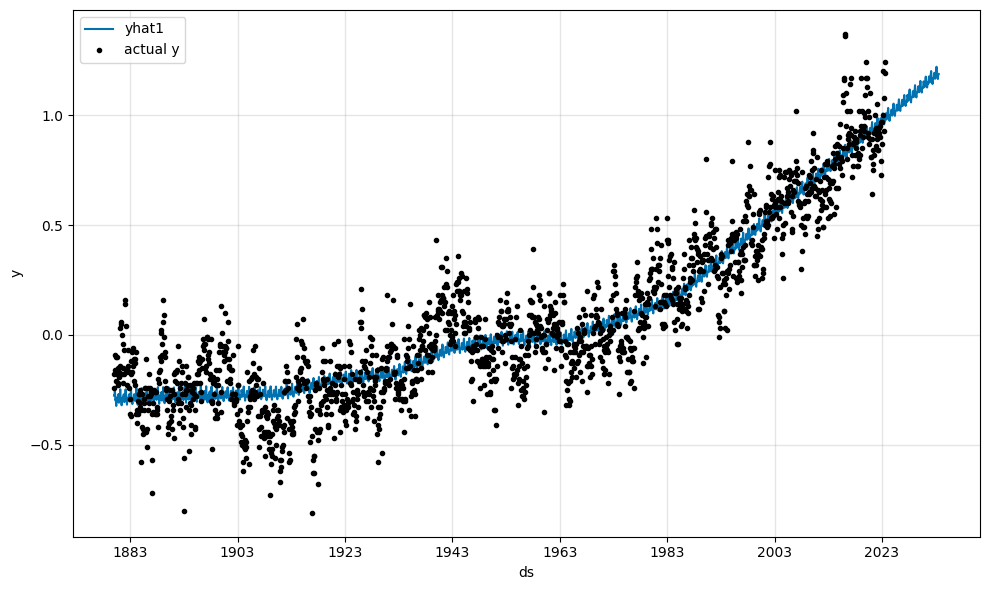

In [ ]:
from neuralprophet import NeuralProphet, set_log_level
m = NeuralProphet()
m.set_plotting_backend("matplotlib")
metrics = m.fit(df_nasa[['y', 'ds']], batch_size= 100, learning_rate=0.01)
df_future = m.make_future_dataframe(df_nasa[["y","ds"]], n_historic_predictions=True, periods=120) # periods in months
forecast = m.predict(df_future)
m.plot(forecast)

## Map of temperatures and analysis of global warming Per Country
## Period:
## 1743-11-01
## 2013-09-01
### Reference:
- https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data
- https://www.kaggle.com/code/amelinvladislav/map-of-temperatures-and-analysis-of-global-warming
- https://colab.research.google.com/github/amadords/Projetos-Publicos/blob/master/Introdu%C3%A7%C3%A3o_ao_Plotly.ipynb#scrollTo=EUXzRF0ABxqY

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/DATASETS/GlobalLandTemperaturesByCountry.csv")

In [ ]:
print(df.columns)
#
df.drop(columns=['AverageTemperatureUncertainty'], axis='1', inplace=True)

Index(['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'Country'], dtype='object')


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

import plotly.io as pio
pio.renderers

pio.renderers.default = 'colab'

In [ ]:
#Let's remove the duplicated countries (in the analysis, we don't consider the presence of
#colonies at this the countries) and countries for which no information about the temperature

global_temp_country_clear = df[~df['Country'].isin(
    ['Denmark', 'Antarctica', 'France', 'Europe', 'Netherlands',
     'United Kingdom', 'Africa', 'South America'])]

global_temp_country_clear = global_temp_country_clear.replace(
   ['Denmark (Europe)', 'France (Europe)', 'Netherlands (Europe)', 'United Kingdom (Europe)'],
   ['Denmark', 'France', 'Netherlands', 'United Kingdom'])

#Let's average temperature for each country

countries = np.unique(global_temp_country_clear['Country'])
#countries = ['Brazil']
mean_temp = []
for country in countries:
    temp_avg = global_temp_country_clear[global_temp_country_clear['Country'] == country]['AverageTemperature'].mean()
    temp_avg = round(temp_avg,2)
    mean_temp.append(temp_avg)

data = [ dict(
        type = 'choropleth',
        locations = countries,
        z = mean_temp,
        locationmode = 'country names',
        text = "°C", # Aparece do lado direito no mapa
        marker = dict(
            line = dict(color = 'rgb(0,0,0)', width = 1)),
            colorbar = dict(autotick = True, tickprefix = ' ',
            title = "# Average\nTemperature,\n°C")
            )
       ]

layout = dict(
    title = 'Average land temperature in countries',
    geo = dict(
        showframe = False,
        showocean = True,
        oceancolor = 'rgb(0,255,255)',
        projection = dict(
        type = 'orthographic',
            rotation = dict(
                    lon = 60,
                    lat = 10),
        ),
        lonaxis =  dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
            ),
        lataxis = dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
                )
            ),
        )

fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename= 'worldmap')


In [ ]:
df = global_temp_country_clear

In [ ]:
print("Start:", df.dt.min())
print("End:", df.dt.max())

Start: 1743-11-01
End: 2013-09-01


In [ ]:
df.isnull().sum()

dt                        0
AverageTemperature    31522
Country                   0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df

,dt,AverageTemperature,Country
0,1743-11-01,4.384,Åland
5,1744-04-01,1.530,Åland
6,1744-05-01,6.702,Åland
7,1744-06-01,11.609,Åland
8,1744-07-01,15.342,Åland
...,...,...,...
577456,2013-04-01,21.142,Zimbabwe
577457,2013-05-01,19.059,Zimbabwe
577458,2013-06-01,17.613,Zimbabwe
577459,2013-07-01,17.000,Zimbabwe


In [ ]:
df['data'] = pd.to_datetime(df['dt'], format='%Y-%m')

In [ ]:
df.set_index('data', inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 526013 entries, 1743-11-01 to 2013-08-01
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   dt                  526013 non-null  object 
 1   AverageTemperature  526013 non-null  float64
 2   Country             526013 non-null  object 
dtypes: float64(1), object(2)
memory usage: 16.1+ MB


In [ ]:
df.drop(columns=['dt'], axis='1', inplace=True)

## Análise Temperaturas Médias no Brasil e América do Sul

In [ ]:
df_br = df.loc[df.Country == "Brazil"]

In [ ]:
df_br

,AverageTemperature,Country
data,,
1832-01-01,24.935,Brazil
1832-02-01,24.505,Brazil
1832-03-01,24.617,Brazil
1832-04-01,23.990,Brazil
1832-05-01,23.124,Brazil
...,...,...
2013-04-01,25.464,Brazil
2013-05-01,24.906,Brazil
2013-06-01,24.788,Brazil


<Figure size 1500x1000 with 0 Axes>

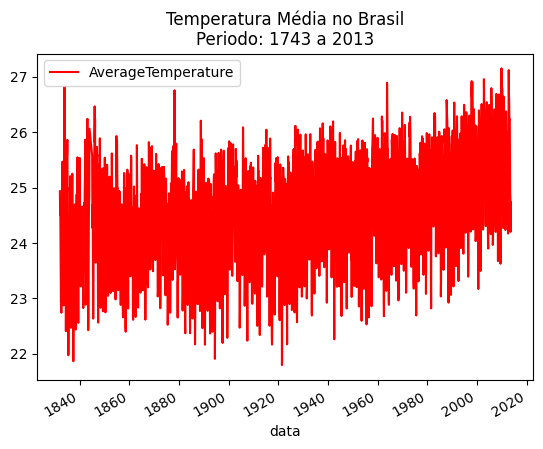

In [ ]:
plt.figure(figsize= (15,10))
df_br.plot(kind='line', title='Temperatura Média no Brasil\nPeriodo: 1743 a 2013',color='red')
plt.show();

### Periodos de 10, 20, 30 e 50 anos.


					Temperatura Média no Brasil



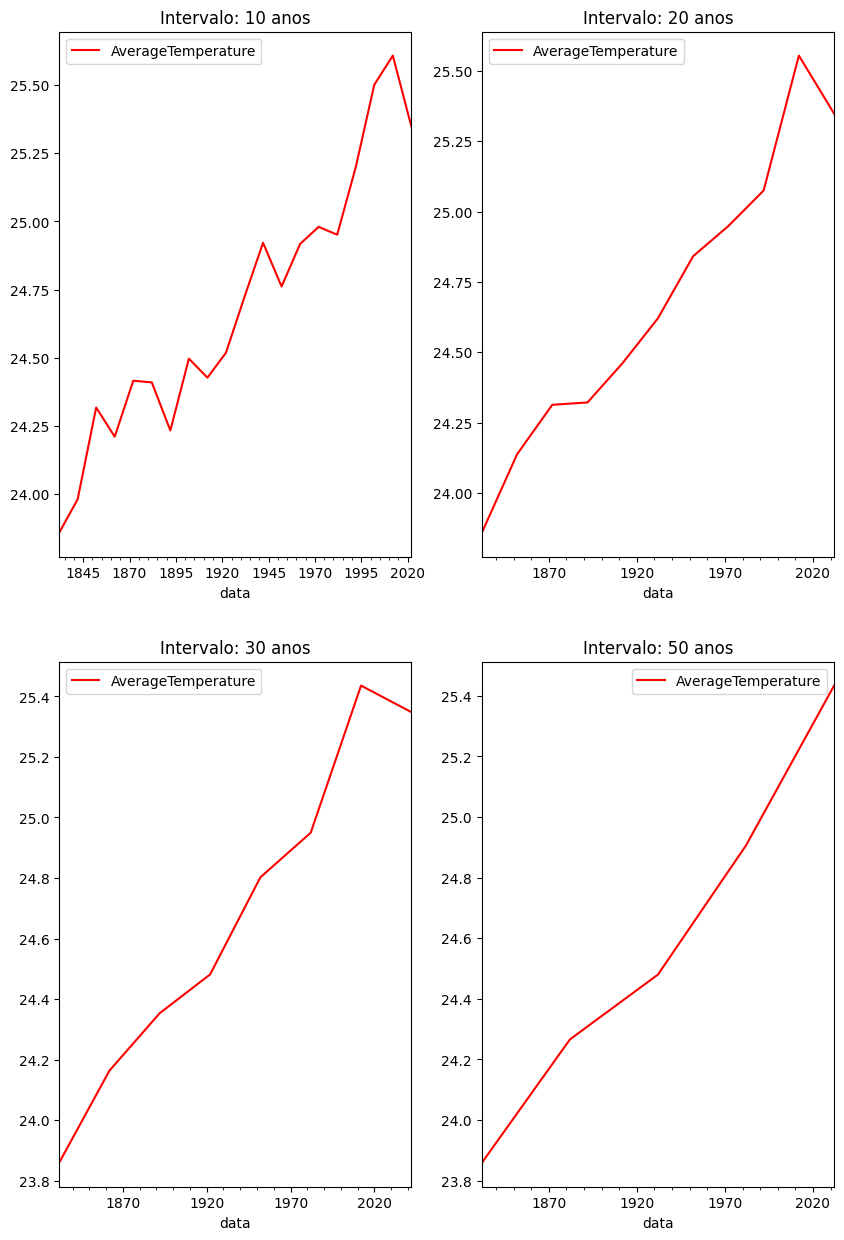

In [ ]:
df1 = df_br.resample('10Y').mean()
df2 = df_br.resample('20Y').mean()
df3 = df_br.resample('30Y').mean()
df4 = df_br.resample('50Y').mean()
#define subplot layout
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 15))

print ('\033[1m' + "\n\t\t\t\t\tTemperatura Média no Brasil\n")
#add DataFrames to subplots
df1.plot(ax=axes[0,0], title='Intervalo: 10 anos',color='red')
df2.plot(ax=axes[0,1], title='Intervalo: 20 anos',color='red')
df3.plot(ax=axes[1,0], title='Intervalo: 30 anos',color='red')
df4.plot(ax=axes[1,1], title='Intervalo: 50 anos',color='red');

In [ ]:
america_do_sul = ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador','Paraguai', 'Peru', 'Suriname', 'Uruguai', 'Venezuela']
#
df_south_america = df.loc[df.Country.isin (america_do_sul)]

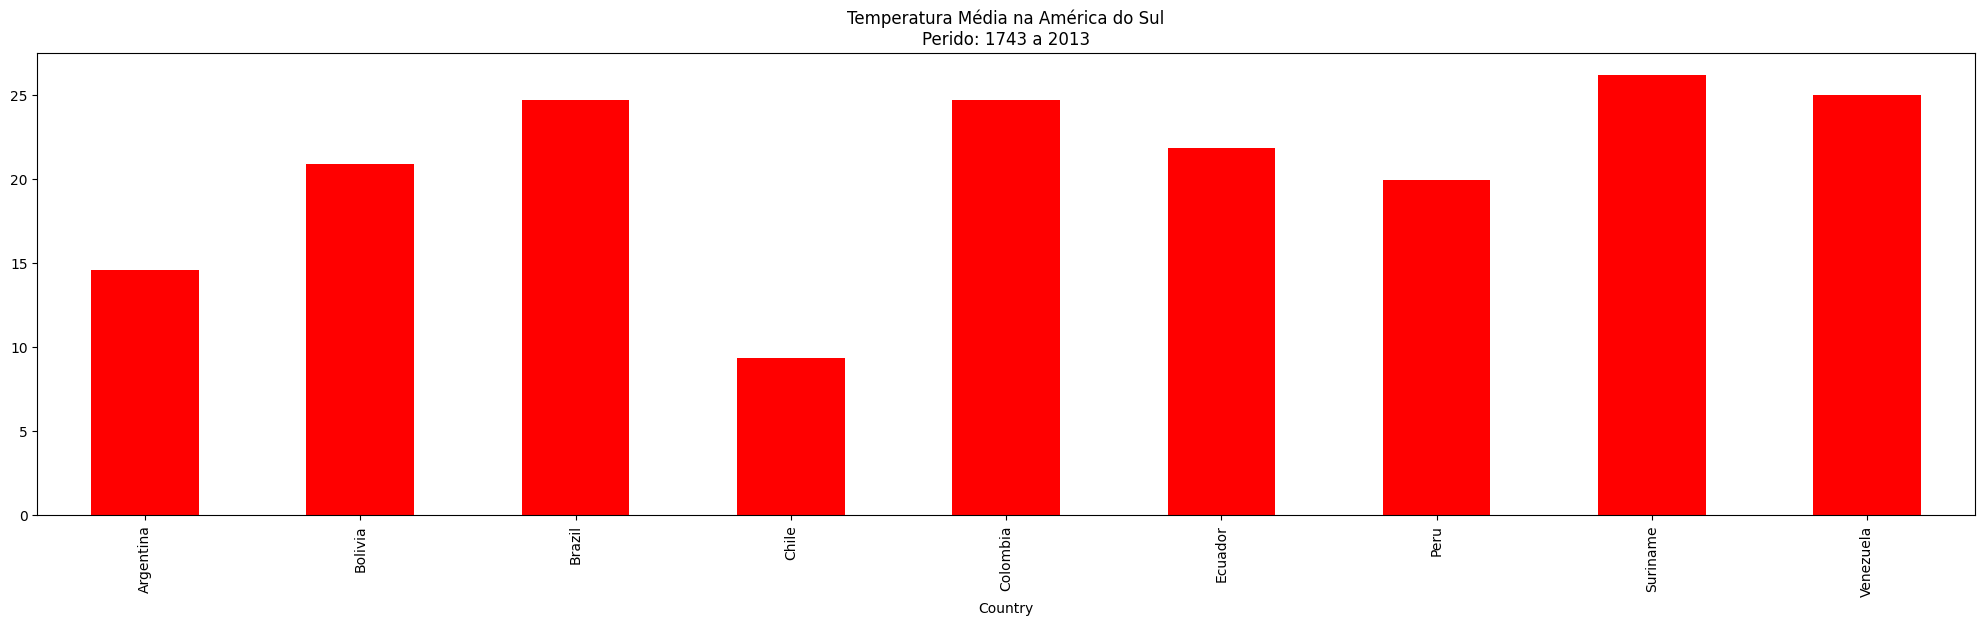

In [ ]:
df_ag_temp = df_south_america.groupby('Country')['AverageTemperature'].mean()
plt.figure(figsize= (25,6))
df_ag_temp.plot(kind='bar', title='Temperatura Média na América do Sul\nPerido: 1743 a 2013',color='red')
plt.show();

## NeuralPhophet

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/DATASETS/GlobalLandTemperaturesByCountry.csv")

In [ ]:
df = df.dropna()
#
df_br = df.loc[df.Country == "Brazil"]


In [ ]:
df_br

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
77110,1832-01-01,24.935,1.372,Brazil
77111,1832-02-01,24.505,1.953,Brazil
77112,1832-03-01,24.617,1.359,Brazil
77113,1832-04-01,23.990,2.013,Brazil
77114,1832-05-01,23.124,1.592,Brazil
...,...,...,...,...
79285,2013-04-01,25.464,0.253,Brazil
79286,2013-05-01,24.906,0.236,Brazil
79287,2013-06-01,24.788,0.251,Brazil
79288,2013-07-01,24.202,0.201,Brazil


### Deve ter duas colunas apenas. Coluna ds para a data e y para os valores.


In [ ]:
df_br.drop(['Country', 'AverageTemperatureUncertainty'], axis=1, inplace=True)

In [ ]:
df_br

,dt,AverageTemperature
77110,1832-01-01,24.935
77111,1832-02-01,24.505
77112,1832-03-01,24.617
77113,1832-04-01,23.990
77114,1832-05-01,23.124
...,...,...
79285,2013-04-01,25.464
79286,2013-05-01,24.906
79287,2013-06-01,24.788
79288,2013-07-01,24.202


In [ ]:
df_br.rename(columns={'dt': 'ds', 'AverageTemperature':'y'}, inplace=True)

### Dataset com dados do Brasil
### Últimos 1000 meses ou 83 anos.

In [ ]:
df_br_last_1000 = df_br.tail(1000)

In [ ]:
df_br = df_br_last_1000

In [ ]:
df_br

,ds,y
78290,1930-05-01,24.231
78291,1930-06-01,23.905
78292,1930-07-01,23.218
78293,1930-08-01,24.447
78294,1930-09-01,25.074
...,...,...
79285,2013-04-01,25.464
79286,2013-05-01,24.906
79287,2013-06-01,24.788
79288,2013-07-01,24.202


### Model NeuralProphet

WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.9]% of the data.
INFO:NP.df_utils:Major frequency MS corresponds to [99.9]% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as MS
INFO:NP.df_utils:Dataframe freq automatically defined as MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO:NP.ut

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.9]% of the data.
INFO:NP.df_utils:Major frequency MS corresponds to [99.9]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO:NP.df_utils:Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.911]% of the data.
INFO:NP.df_utils:Major frequency MS corresponds to [99.911]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO:NP.df_utils:Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.911]% of the data.
INFO:NP.df_utils:Major frequency MS corresponds to [99.911]% of the data.
INFO - (NP.df_utils._infer_frequency) - De

Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


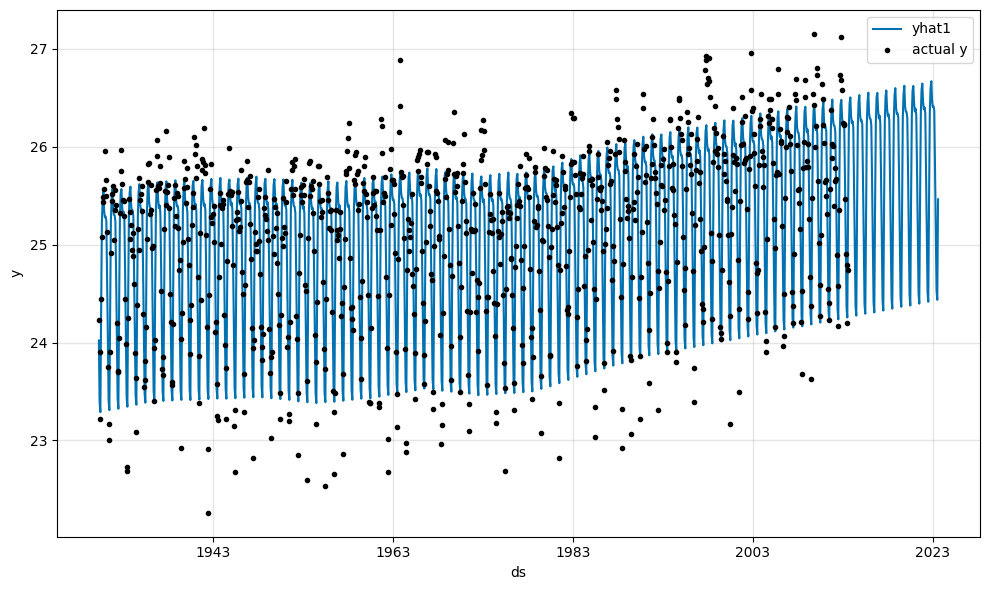

In [ ]:
from neuralprophet import NeuralProphet, set_log_level
m = NeuralProphet()
m.set_plotting_backend("matplotlib")
metrics = m.fit(df_br, batch_size= 100, learning_rate=0.01)
df_future = m.make_future_dataframe(df_br[["y","ds"]], n_historic_predictions=True, periods= 120)
forecast = m.predict(df_future)
m.plot(forecast)

WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


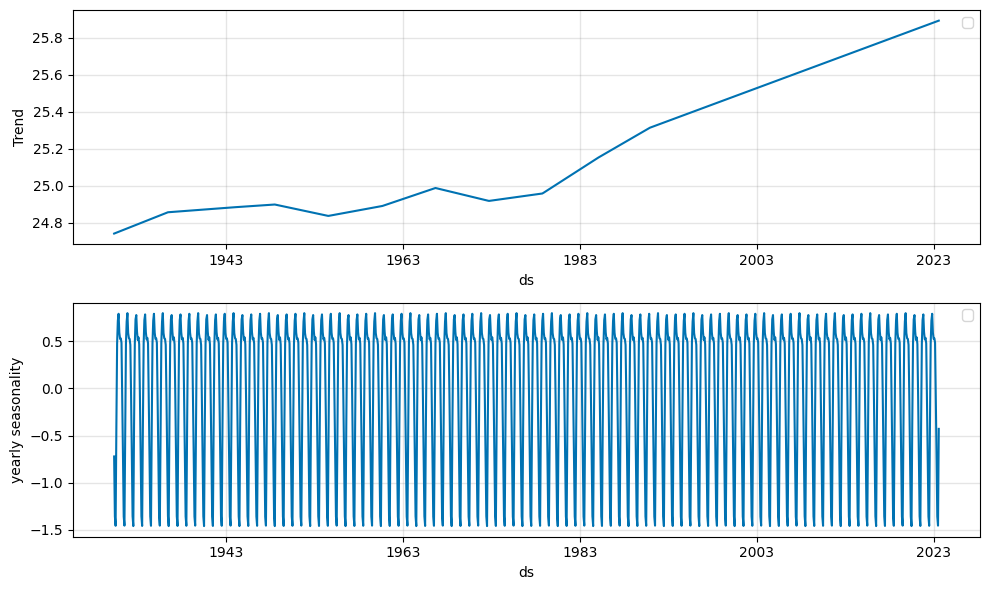

In [ ]:
m.plot_components(forecast);

### Distribuição dos dados no dataset usado.


WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


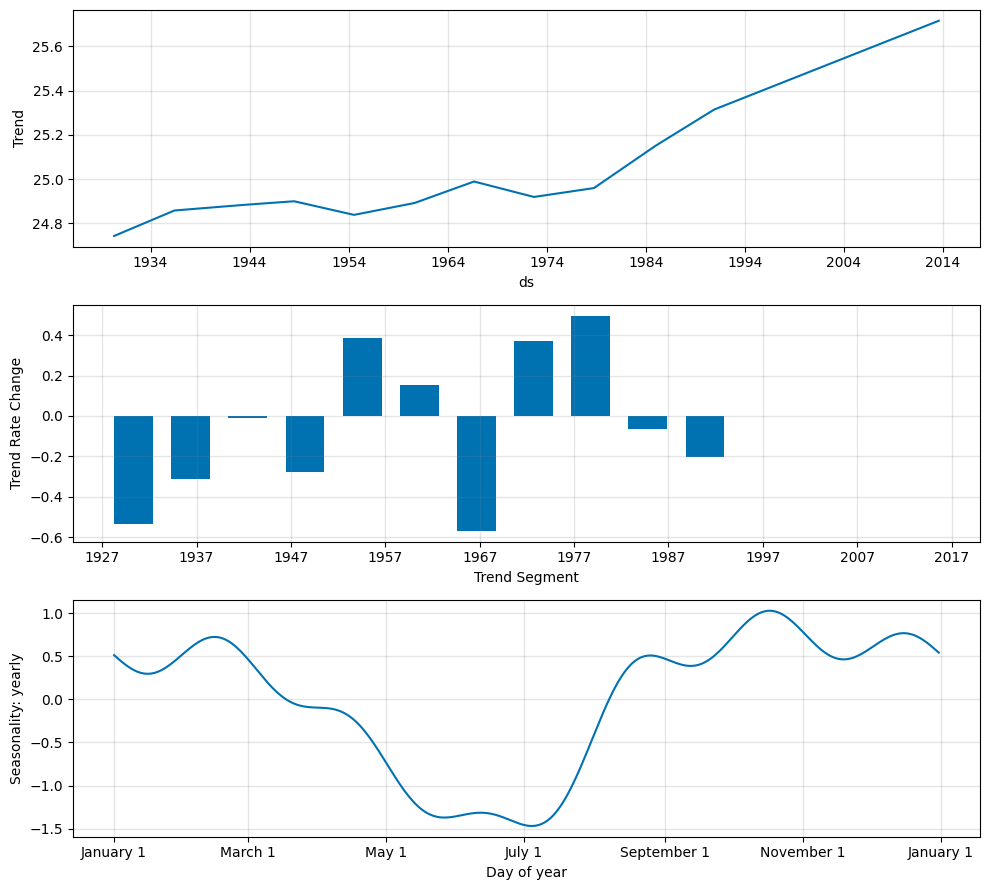

In [ ]:
m.plot_parameters()